# Telco Customer Churn Prediction

### 1.1 Introduction

Telco receives a lot of customers who subscribe to their service to get access to the fastest possible communication access through mobile and internet services. There are diverse set of applications which Telco gives to their users such as mobile services and communication tools to name a few. 

One of the challenges that the company faces is to get to know beforehand whether a customer who has activated a service under Telco is going to leave or stay in the service (churn). If they know that a customer is going to leave the service based on a set of factors such as Gender and whether they are Senior citizen or not, they can come up with affordable plans or give promotional offers so that they retain the customer without them having to move to options from other companies. 

### 1.2 Machine Learning and Data Science

There are a lot of technologies and tools which are build with the aid of machine learning and data science. Considering that the data size is large and has useful features, it is possible to gain insights from the data and make predictions. After performing sufficient training and hyperparameter tuning, it is possible to get the best predictions for our models.

We try to combat the challenge by Telco with the aid of data science and machine learning. We take the output variable (Customer Churn) and we try to build the models for prediction with diverse set of features respectively. 



### 1.3 Metrics

Since we are working on a classification problem, we need to ensure we select the metrics that are useful for these problems. Below are the metrics that we are going to be using for our problem. 

1. Log Loss 
2. Accuracy
3. Precision
4. Recall
5. F1-score

### 1.4 Source 

The data was downloaded from Kaggle - a website that hosts data science and machine learning challenges from companies. Below is the link for the dataset along with the definition of various columns used in the data. Feel free to take a look. 

https://www.kaggle.com/blastchar/telco-customer-churn

## Table of Contents

### 1. Telco Customer Churn Prediction

1.1 Introduction 

1.2 Machine Learning and Data Science 

1.3 Metrics

1.4 Source

1.5 Importing the libraries

1.6 Reading the first 5 rows

### 2. Exploratory Data Analysis 

2.1 Missingno

_____________________________________________________________________________________________________


### 1.5 Importing the libraries

It is now time to read the libraries that are important for our machine learning problem. There are libraries such as numpy that would ensure that we get to perform computation with arrays.

In addition, we import seaborn which is used for data visualization and plotting respectively. 

from sklearn, we import preprocessing library which contains StandardScaler we are going to be using for transformed our data respectively. 

Matplotlib is similar to seaborn for plotting. It is also sometimes convenient to use this library for plotting rather than solely relying on Seaborn. 

Pandas library is used to work with the dataframe and reading the values present in them. 

In [608]:
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")

In [609]:
df = pd.read_csv("Telco Customer Churn.csv")

### 1.6 Reading the first 5 rows

Let us explore the first 5 rows of our dataframe to get to understand the columns that we are going to be working in the data respectively. 

In [610]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Using 'describe' ensures that we are getting the values for the numerical columns such as the mean, standard deviation, minimum value and 1st, 2nd, 3rd and Maximum values. 

In [611]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### 2.1 Missingno 

Missingno is a useful library to plot the missing values in our dataframe. If there are any missing values in our data, we get an output for that particular column with white stripes which indicates the presence of missing value.

Let us see from our data if there are any missing values present in them. 

In [612]:
import missingno as msno

<AxesSubplot:>

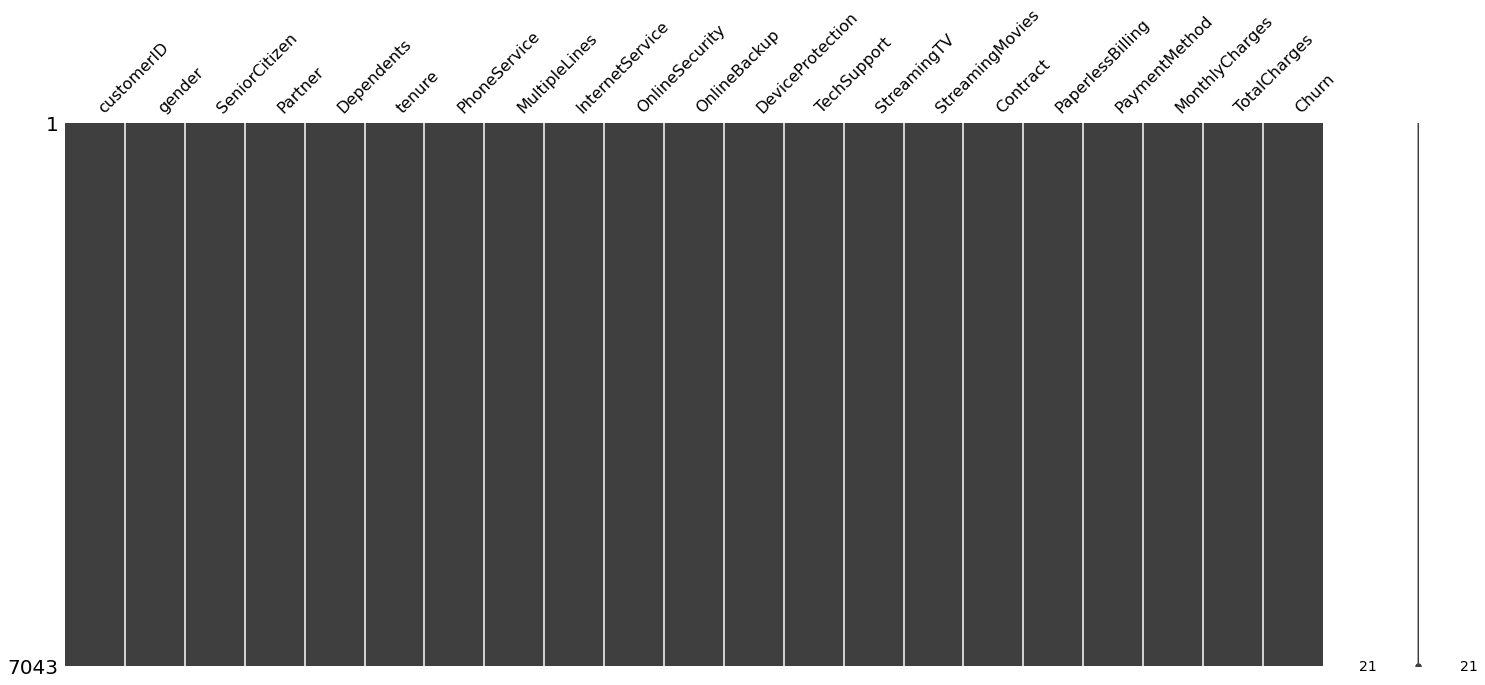

In [613]:
msno.matrix(df)

### Observation: 

We see that there are no missing values in our columsn as presented by the missingno plot. Therefore, we can start processing the data and understand it. 

In [614]:
print("The shape of the dataframe is: {}".format(df.shape))

The shape of the dataframe is: (7043, 21)


### Observation:

We are currently working with about 7043 customers with many attributes or features such as their gender and whether they are a senior citizen or not. There are many other features that we have considered that makes this problem interesting. 

In [615]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The above lists the columns that we are going to be working in our dataset. 

In [616]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [617]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [618]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [619]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [621]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [622]:
print("We are ensuring that there are no duplicate customers in our data")
print("The total number of unique customers in the data: {}".format(    len(df['customerID'].unique())))

We are ensuring that there are no duplicate customers in our data
The total number of unique customers in the data: 7043


In [623]:
## Palette values
## Thanks to https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f.
## We were able to use all the palettes that were mentioned in the blog

palette_values = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r',
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
 'Wistia','Wistia_r','YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [624]:
def countplot_function(dataframe, column, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = figsize)
    sns.countplot(dataframe[column], palette = palette)
    plt.title("{} countplot".format(column), fontsize = 15)
    plt.xlabel("{}".format(column), fontsize = 10)
    plt.show()

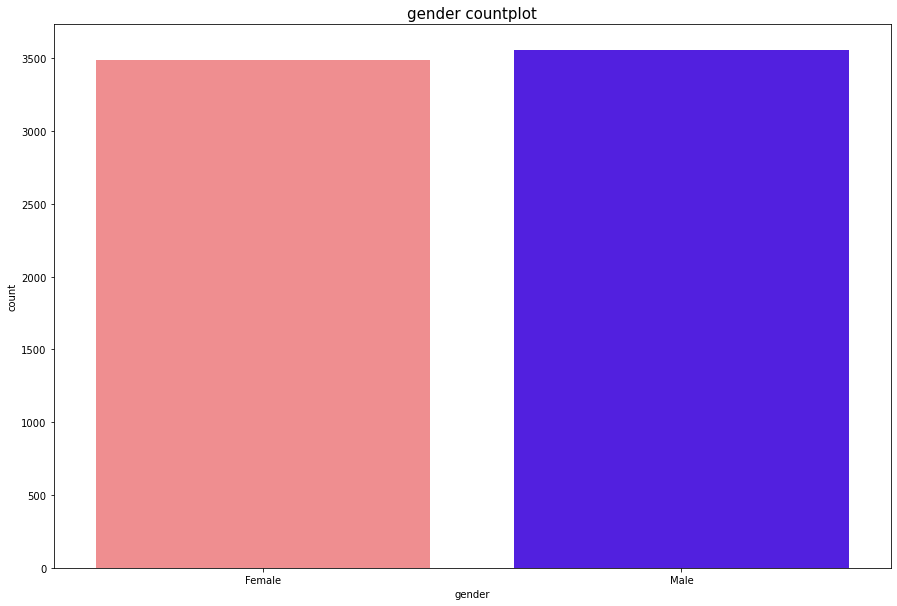

In [625]:
countplot_function(dataframe = df, column = 'gender', palette = random.choice(palette_values))

## Observation:

1. We see that there are equal number of male and female in our data. 
2. Therefore, the 2 groups are represented equally to understand their overall behavior towards Telco.

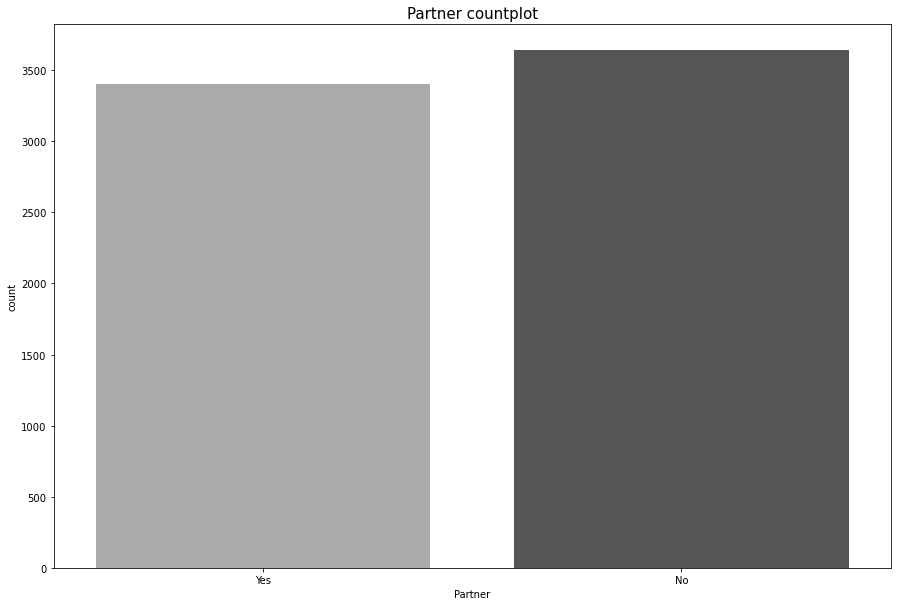

In [626]:
countplot_function(dataframe = df, column = "Partner", palette = random.choice(palette_values))

## Observation: 

1. There are more number of people who do not have partners compared to the ones who have partners.
2. Since we have more data for the people who do not have partners, we should be able to predict their behavior and determine well whether they would leave the telco service or not. 

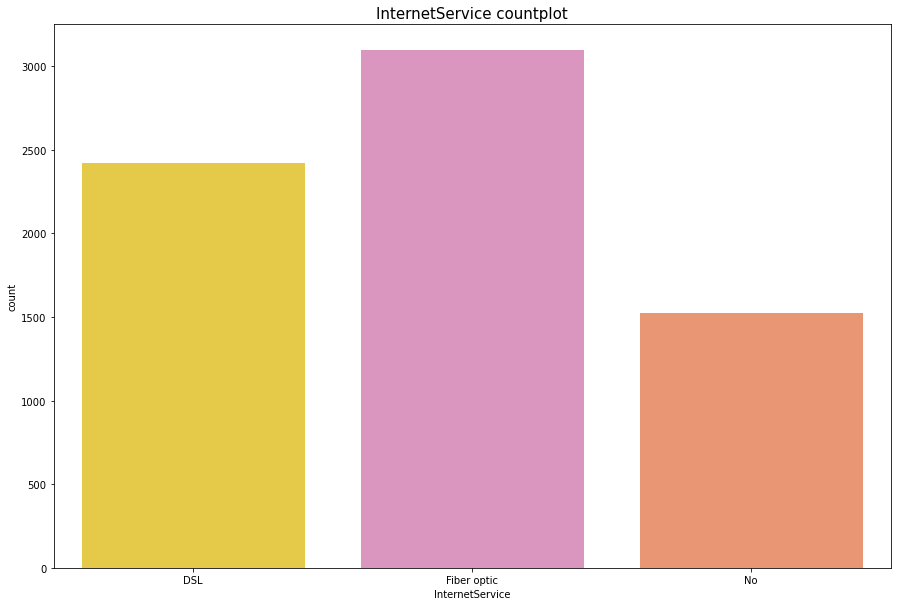

In [627]:
countplot_function(dataframe = df, column = "InternetService", palette = random.choice(palette_values))

## Observation:

1. It could be seen that most of the Telco services are Fiber Optic service as this option is becoming common among customers.
2. The data does a good job of reflecting the latest trends as most people opt fiber optic services compared to DSL services.

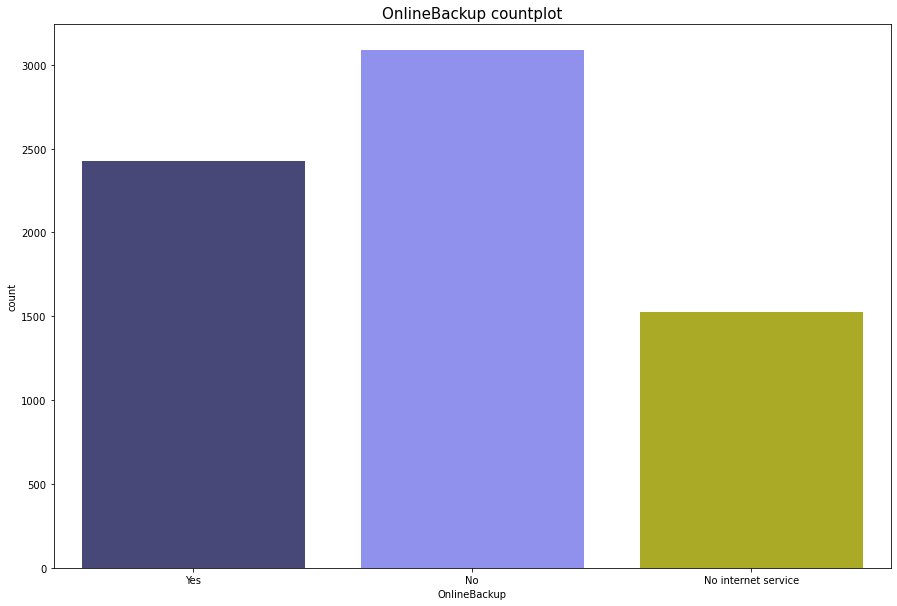

In [628]:
countplot_function(dataframe = df, column = "OnlineBackup", palette = random.choice(palette_values))

## Observation:

1. Most people in our data do not prefer Online Backup Services as clearly shown in the above plot.
2. There are quite a number of people who do not opt the internet service as well.
3. Therefore, we should also consider whether a person has an internet service or not before determining whether they would prefer online backup. 

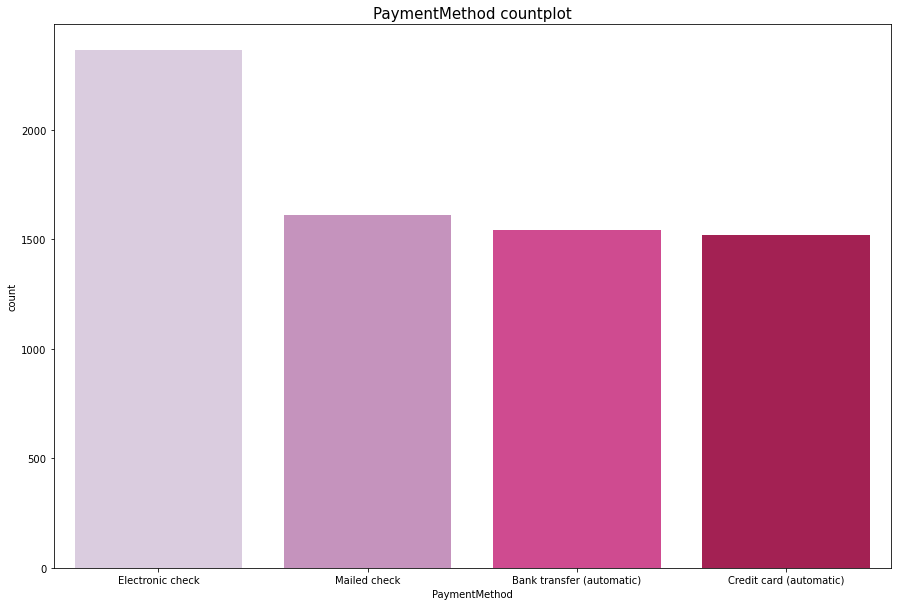

In [629]:
countplot_function(dataframe = df, column = "PaymentMethod", palette = random.choice(palette_values))

## Observation:

1. A large portion of users from Telco prefer Electronic Check compared to other options. 
2. There are other options which are popular among the customers as well such as Mailed check, Bank transfer (automatic) and Credit card (automatic) respectively.
3. As a result, we should be able to more accurately predict the behavior of the customers who use the payment method of electronic check compared to other methods. 

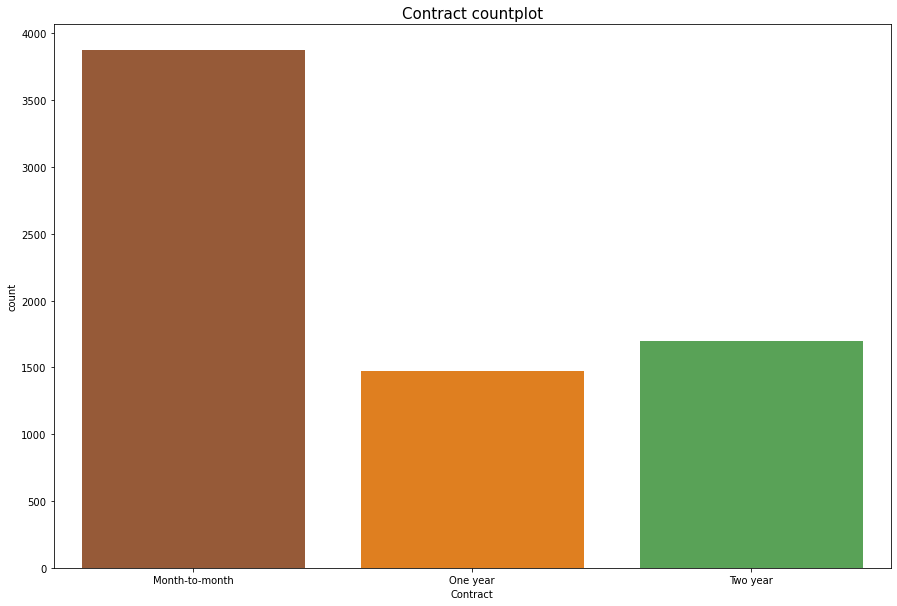

In [630]:
countplot_function(dataframe = df, column = "Contract", palette = random.choice(palette_values))

## Observation:

1. We have a significantly large portion of the data where the contract is month-to-month compared to either one-year and two-year contracts.
2. This is true in real-life as well because most of the customers prefer to stick with month-to-month contract rather than staying with the same service for a long period of time. 
3. Hence, we see that this data is quite reflective of the real-world. 

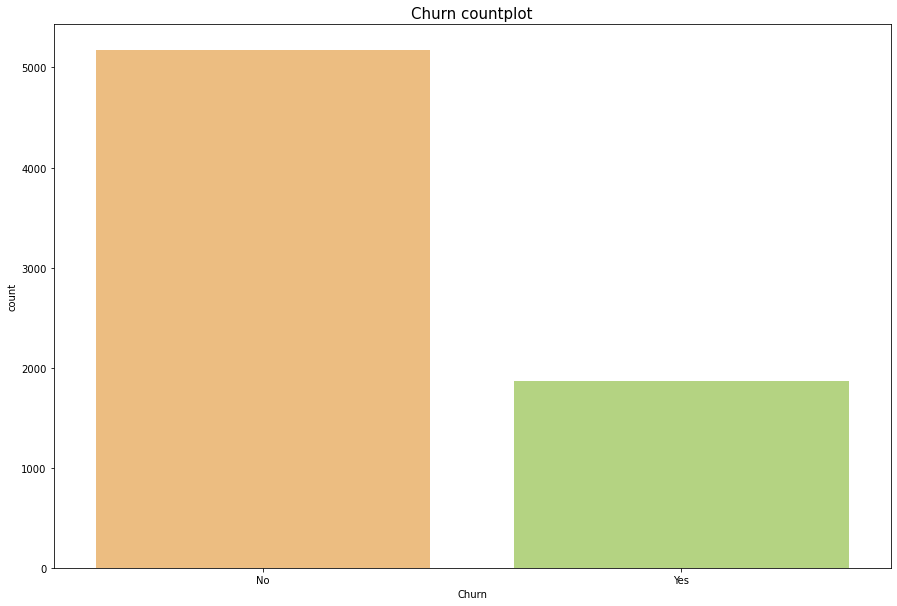

In [631]:
countplot_function(dataframe = df, column = "Churn", palette = random.choice(palette_values))

## Observation:

1. It is now important to observe the total number of customers who have churned (left the service) after a particular span of time.
2. We see that a large portion of our customers did not leave the service. 
3. We also see that there are a few customers who left the service. We see that there is no overwhelming difference between the count of the customers who stayed in the service vs customers who have left or churned. 
4. Hence, we can proceed with the data without adding additional customers who decided to churn. 

In [632]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [633]:
def boxplot_function(dataframe, x_value, y_value, title_size = 15, label_size = 10, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = (figsize))
    sns.boxplot(x = x_value, y = y_value, data = dataframe, palette = palette)
    plt.xlabel("{} Value".format(x_value), fontsize = label_size)
    plt.ylabel("{} Value".format(y_value), fontsize = label_size)
    plt.title("{} Vs. {} Boxplot".format(x_value, y_value), fontsize = title_size)
    plt.show()

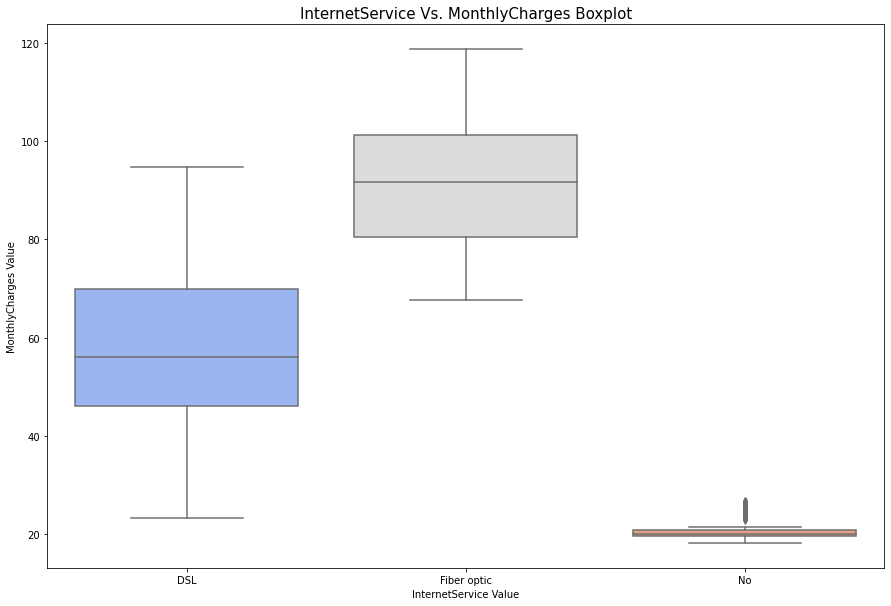

In [634]:
boxplot_function(dataframe = df, x_value = "InternetService", y_value = "MonthlyCharges", palette = "coolwarm")

## Observation:

1. It could easily be seen from the box plots that the people who opted for 'Fiber optic' service have higher monthly charges.
2. People who opted for 'DSL' service has signifantly lower monthly charges as shown above.
3. As expecte, customers who do not enroll in the internet service have low charges as shown. 

In [635]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


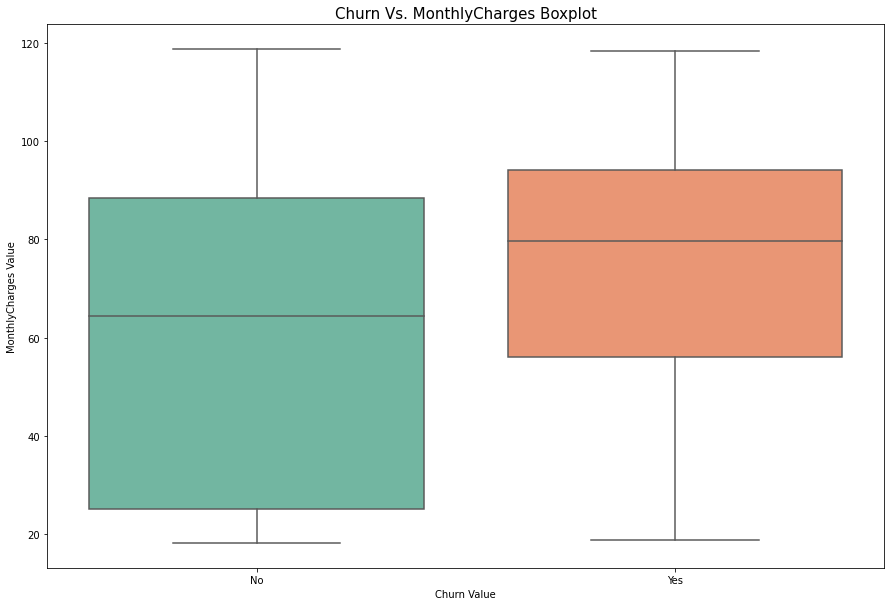

In [636]:
boxplot_function(dataframe = df, x_value = "Churn", y_value = "MonthlyCharges", palette = random.choice(palette_values))

## Observation:

1. It could be seen as the monthly charges are increasing, there is a higher possibility that the customers are inclined to leave the service.
2. People who stay in the service usually have low monthly charges.
3. Therefore, Telco company could take action based on the plots and reduce the prices of various services as this would ensure that most customers are inclined to stay in the service. 

In [637]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# Used the above link to replace the missing value in 'Total Charges' to '0' so that 
# it would be easy to convert the values respectively.
## Replacing the missing value with Medin value from the Total Charges.
## This is because Median is robust to outliers.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', '1394.55'))

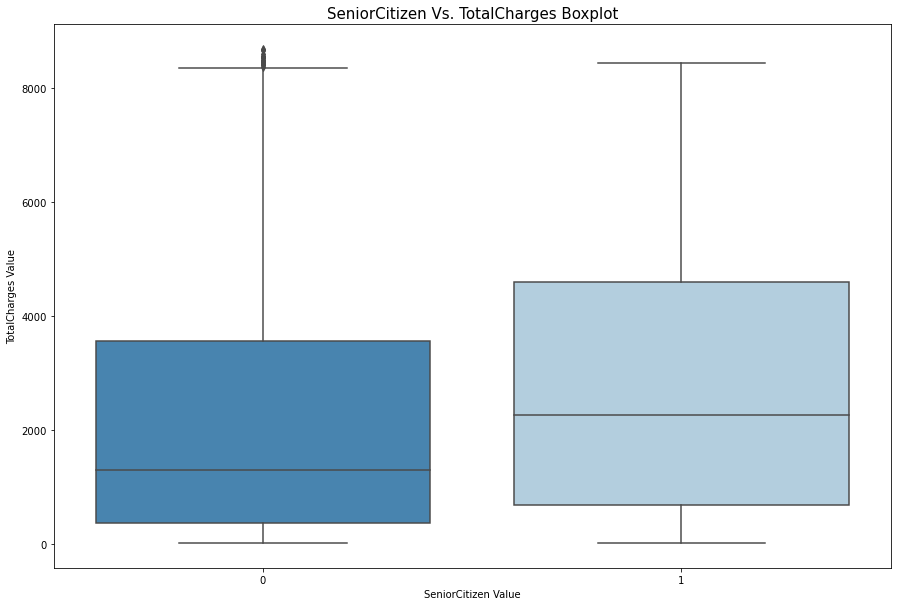

In [638]:
boxplot_function(dataframe = df, x_value = "SeniorCitizen", y_value = "TotalCharges", palette = random.choice(palette_values))

## Observation:

1. Based on the above boxplot, it could be seen that whether a person is a senior citizen or not has an impact of the total charges.
2. Senior citizens usually are quite rich and they usually work which means that they have higher income.
3. As a result, they might be opting for more services from Telco leading to higher total charges.

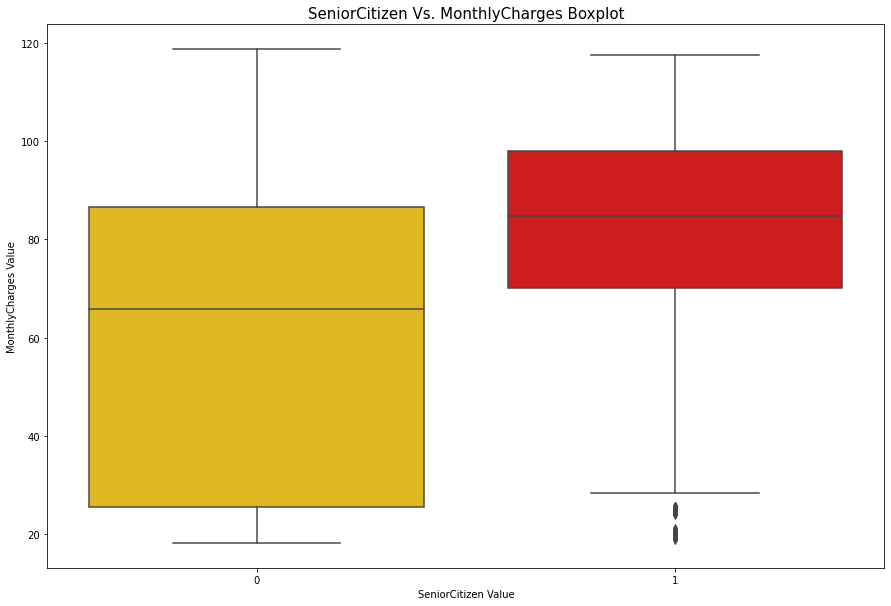

In [639]:
boxplot_function(dataframe = df, x_value = 'SeniorCitizen', y_value = 'MonthlyCharges', palette = random.choice(palette_values))

## Observation:

1. Monthly charges are significantly higher for Senior Citizens compared to Non-Senior Citizens respectively.
2. As a result, this leads us to believe that senior citizens are more inclined to add more services from Telco.
3. Therefore, Telco could take action and provide more interesting services to senior citizens compared to non-senior citizens.

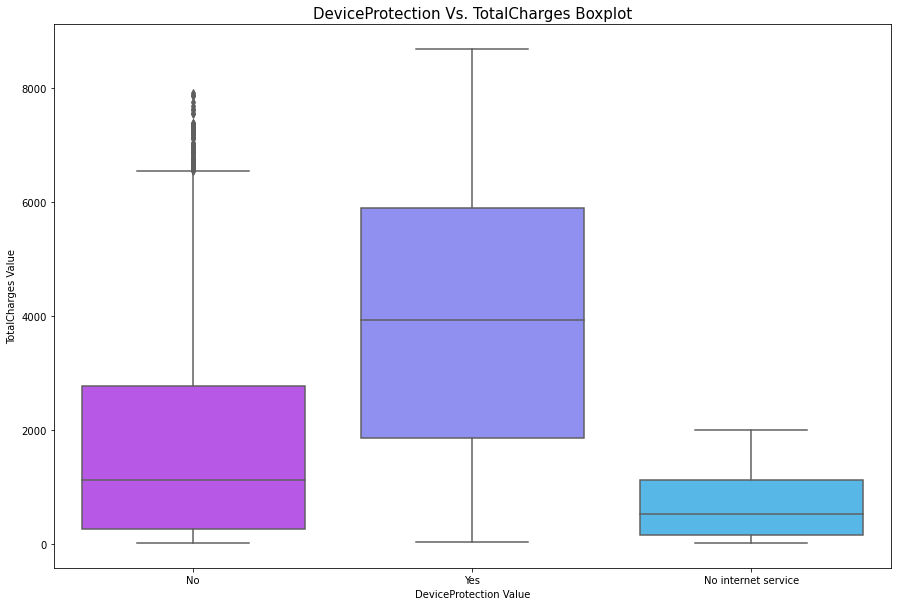

In [640]:
boxplot_function(dataframe = df, x_value = "DeviceProtection", y_value = "TotalCharges", palette = random.choice(palette_values))

## Observation:

1. Device Protection Plans have a very high cost as could be seen from the above.
2. This means that people are paying a lot for Device Protection plans.
3. We have seen from the previous plots that higher the charges, the more inclined are the customers to leave the Telco service.
4. Hence, Telco could take steps to reduce the prices for the Device Protection plans. 

In [641]:
def barplot_function(dataframe, x_value, y_value, hue = None, title_size = 15, label_size = 10, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = (figsize))
    sns.barplot(x = x_value, y = y_value, data = dataframe, hue = hue, palette = palette)
    plt.xlabel("{} Value".format(x_value), fontsize = label_size)
    plt.ylabel("{} Value".format(y_value), fontsize = label_size)
    plt.title("{} Vs. {} Boxplot".format(x_value, y_value), fontsize = title_size)
    plt.show()

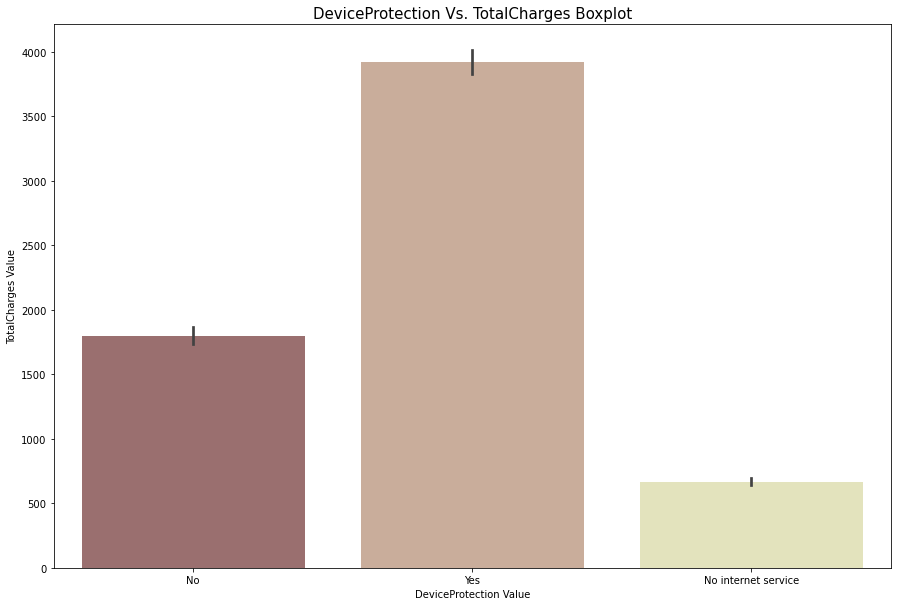

In [642]:
barplot_function(dataframe = df, x_value = 'DeviceProtection', y_value = 'TotalCharges', palette = random.choice(palette_values))

## Observation:

1. This is another way to represent the Device Projection plans and the total charges.
2. We have taken a barplot which represents the average total charges for all the customers based on the device projection plans.

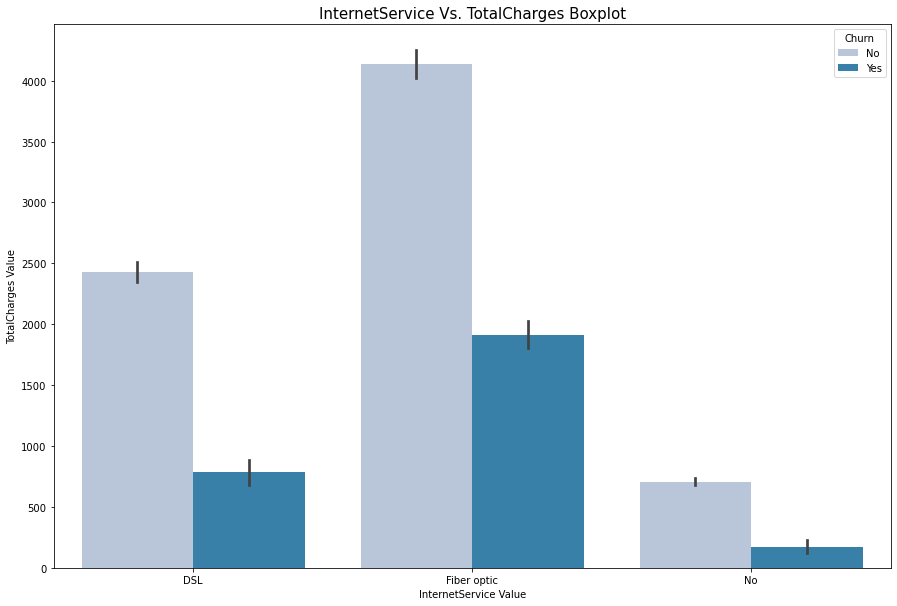

In [643]:
barplot_function(dataframe = df, x_value = 'InternetService', y_value = 'TotalCharges',
                 hue = 'Churn', palette = random.choice(palette_values))

## Observation:

1. Based on this plot, we see that a large portion of customers from Fiber optic option tend to leave the service compared to other internet services.
2. Other services such as DSL service have higher number of customers who are willing to stay with the service.
3. Therefore, Telco might consider what might be the potential case for customers who have taken fiber option to leave the service.
4. If they could come up with the right tactics to improve their fiber option service, this ensures that a large portion of customers are retained. 

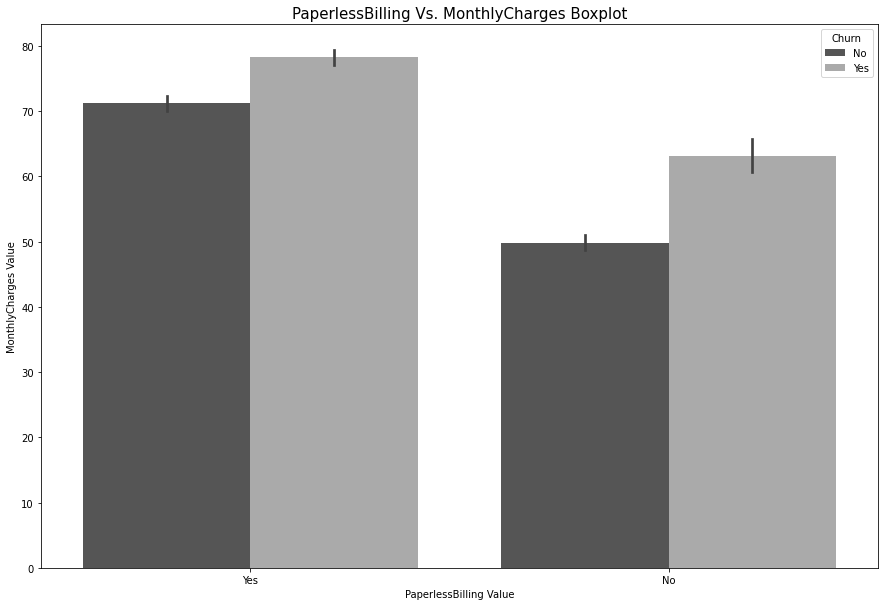

In [644]:
barplot_function(dataframe = df, x_value = 'PaperlessBilling', y_value = 'MonthlyCharges', hue = 'Churn', palette = random.choice(palette_values))

## Observation:

1. Paperless billing customers usually leverage the freedom to use their credit/debit cards and pay more amount compared to the others who prefer paper billing options.
2. This is because it is more convenient to use credit/debit cards to make transaction compared to other services.
3. Hence, whenever a new customer is going to register for the service, Telco can estimate the total charges that might be taken into consideration based on whether a customer opts for paperless billing or not. 

In [645]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


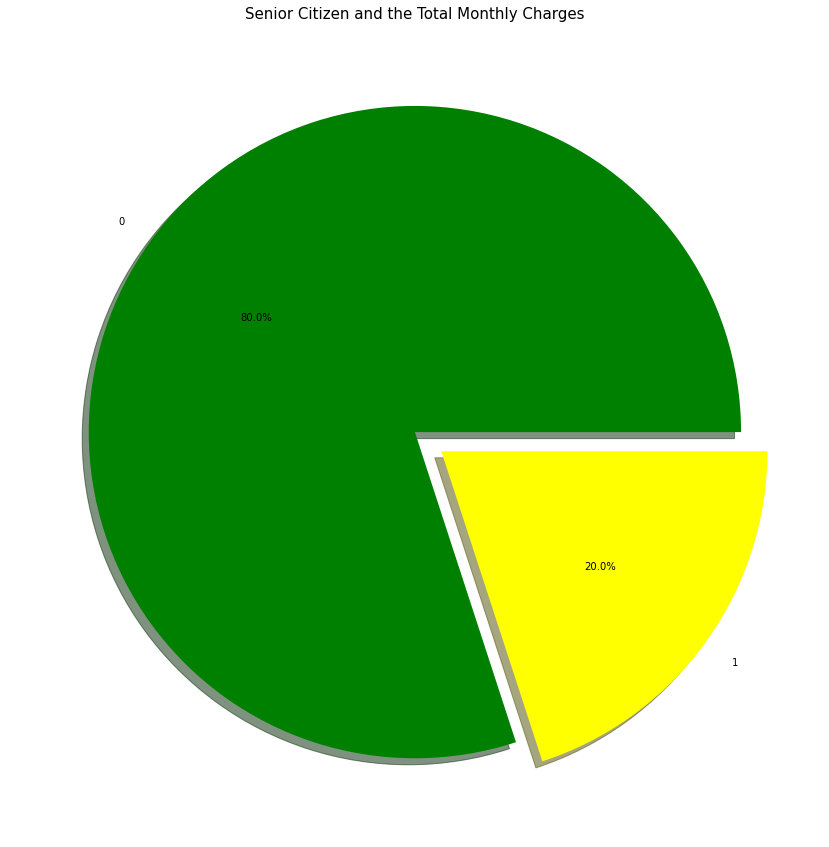

In [646]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'SeniorCitizen').sum()['MonthlyCharges'], labels = df.groupby(by = 'SeniorCitizen').sum().index,
       explode = (0, 0.1), shadow = True,
       autopct = '%1.1f%%', colors = ['Green', 'Yellow'])
plt.title('Senior Citizen and the Total Monthly Charges', fontsize = 15)
plt.show()

## Observation:

1. Based on the plots, it could be seen that senior citizens pay less amount compared to the non-seniors as shown in the above plot respectively. 
2. We have taken the total sum of the monthly charges for senior citizens by grouping them based on their classes as shown in the pie plot above.

In [647]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [648]:
df.groupby(by = 'PhoneService').sum()['MonthlyCharges']

PhoneService
No      28663.5
Yes    427453.1
Name: MonthlyCharges, dtype: float64

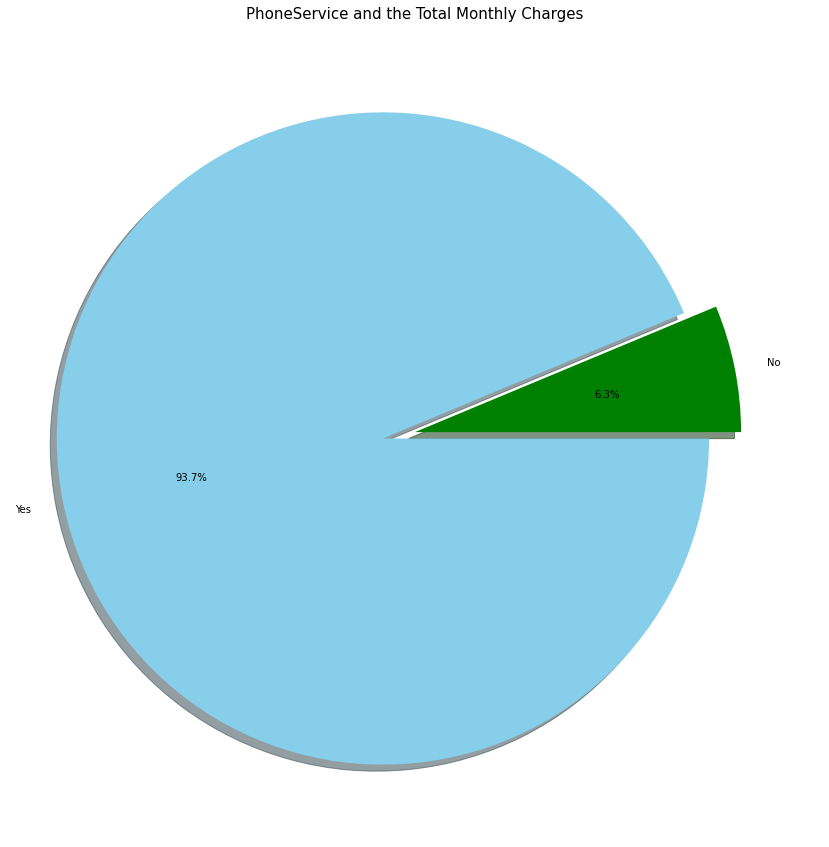

In [649]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'PhoneService').sum()['MonthlyCharges'], labels = df.groupby(by = 'PhoneService').sum().index,
       explode = (0, 0.1), shadow = True,
       autopct = '%1.1f%%', colors = ['Green', 'SkyBlue'])
plt.title('PhoneService and the Total Monthly Charges', fontsize = 15)
plt.show()

## Observation:

1. People who have enrolled in the phone service have a significantly higher proportion of the amount that is payed monthly.
2. People who did not enroll in the phone service has lower proportion of the amount that is payed monthly.

In [650]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [651]:
df.groupby(by = 'InternetService').sum()['MonthlyCharges']

InternetService
DSL            140665.35
Fiber optic    283284.40
No              32166.85
Name: MonthlyCharges, dtype: float64

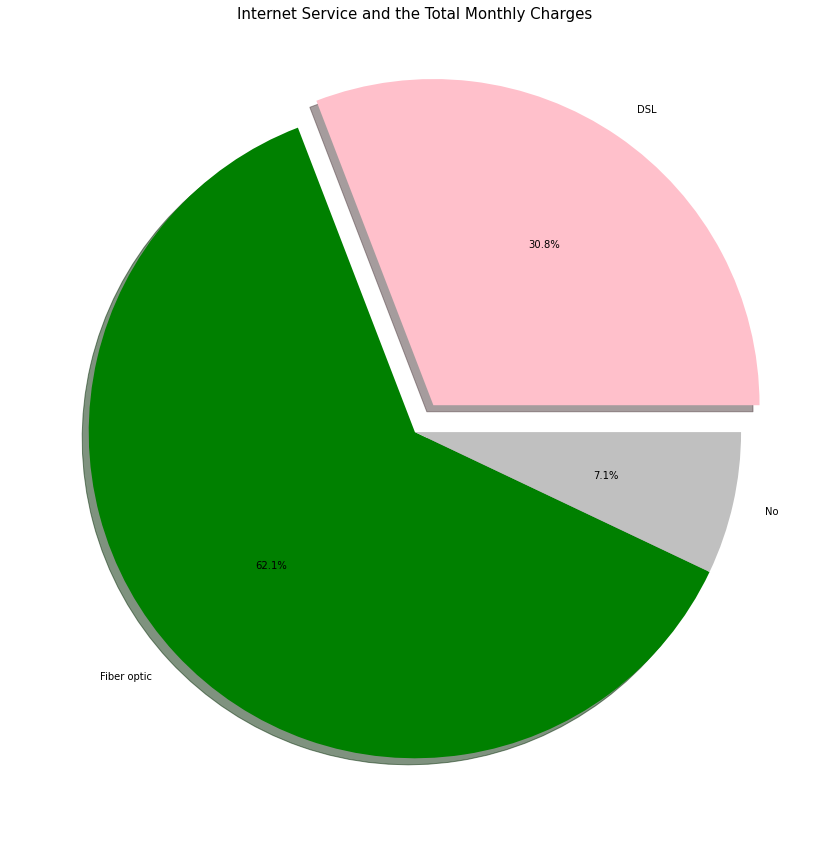

In [652]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'InternetService').sum()['MonthlyCharges'], labels = df.groupby(by = 'InternetService').sum().index,
       explode = (0.1, 0, 0), shadow = True,
       autopct = '%1.1f%%', colors = ['Pink', 'Green', 'Silver'])
plt.title('Internet Service and the Total Monthly Charges', fontsize = 15)
plt.show()

## Observation:

1. The total charges were significantly higher for the Fiber optic customers compared to the other options as indicated in the plots shown above.
2. There are other factors as well that would influence the monthly charges which in turn would influence whether a customer would churn from the service.

In [653]:
df_categorical = df.select_dtypes(include = "object")

In [654]:
df_numerical = df.select_dtypes(exclude = "object")

In [655]:
print("The columns that are categorical in our data are:\n {}".format(df_categorical.columns))

The columns that are categorical in our data are:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [656]:
print("The columns that are numerical in our data are:\n {}".format(df_numerical.columns))

The columns that are numerical in our data are:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [657]:
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [658]:
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [659]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [660]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [661]:
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [662]:
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [663]:
float('314.23')

314.23

In [664]:
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [665]:
df_categorical.drop(['customerID'], axis = 1, inplace = True)

In [666]:
pd.get_dummies(df_categorical.gender, drop_first = True).head()

,Male
0,0
1,1
2,1
3,1
4,0


In [667]:
df_dummy_encoding = pd.get_dummies(df_categorical, drop_first = True)

In [668]:
df_final = pd.concat([df_dummy_encoding, df_numerical], axis = 1)

In [669]:
df_final.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,2,53.85,108.15
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,2,70.70,151.65


In [670]:
from sklearn.model_selection import train_test_split

In [671]:
df_final.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,2,53.85,108.15
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,2,70.70,151.65


In [672]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825466
MonthlyCharges,0.220173,0.247900,1.000000,0.650865
TotalCharges,0.102652,0.825466,0.650865,1.000000


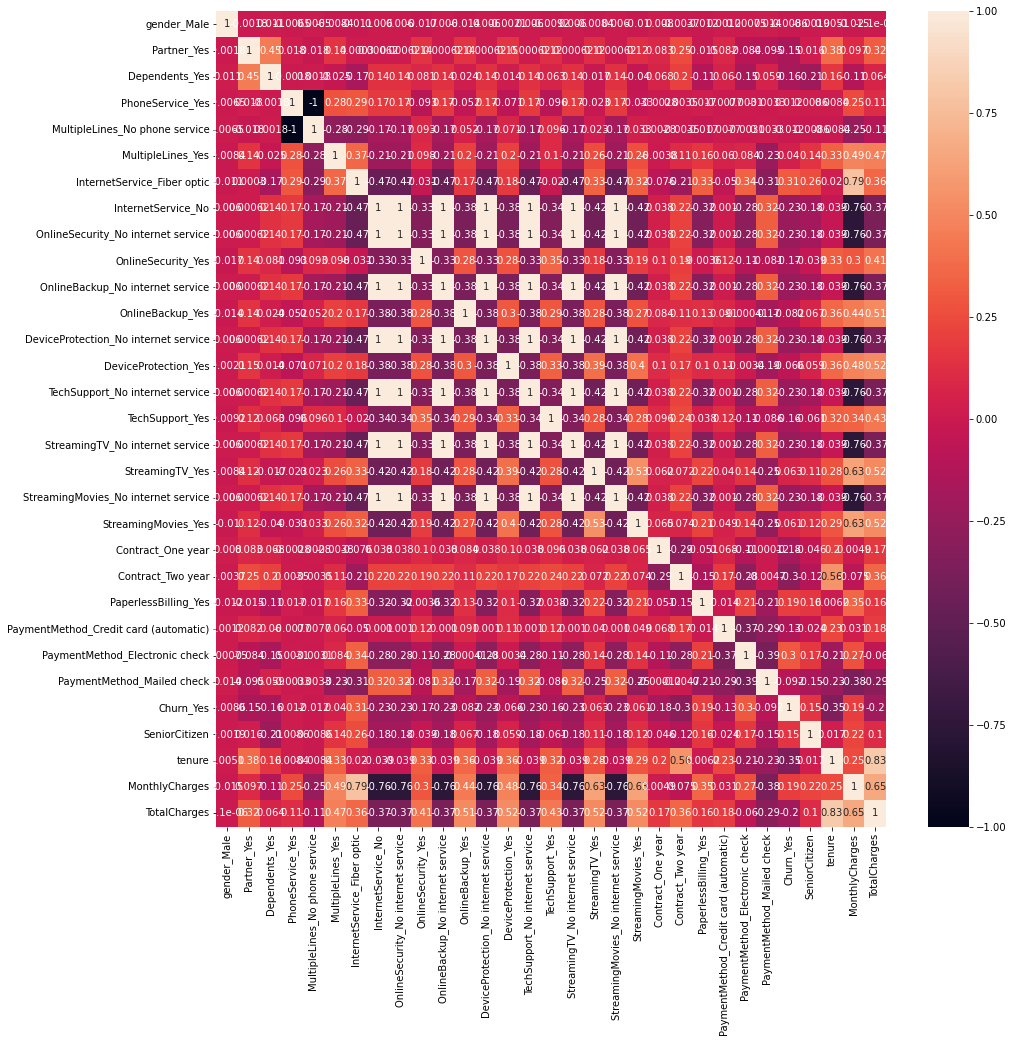

In [673]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_final.corr(), annot = True)
plt.show()

In [674]:
X = df_final.drop(['Churn_Yes'], axis = 1)
y = df_final['Churn_Yes']

In [675]:
X_train, X_cv, y_train, y_cv  = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [676]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_cv_transformed = scaler.transform(X_cv)

In [677]:
print(len(X_train_transformed))

4930


In [678]:
print(len(X_cv_transformed))

2113


In [679]:
y_train.value_counts()

0    3628
1    1302
Name: Churn_Yes, dtype: int64

In [680]:
y_cv.value_counts()

0    1546
1     567
Name: Churn_Yes, dtype: int64

In [681]:
len(X_train_transformed[0])

30

## K Neighbors Classifier

In [682]:
#!pip install -U imbalanced-learn

In [683]:
from imblearn.over_sampling import SMOTE

In [684]:
sampler = SMOTE()
X_train_transformed, y_train = sampler.fit_resample(X_train_transformed, y_train)
X_cv_transformed, y_cv = sampler.fit_resample(X_cv_transformed, y_cv)

In [685]:
from sklearn.neighbors import KNeighborsClassifier

In [686]:
model = KNeighborsClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [687]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [688]:
print(confusion_matrix(y_cv, y_predictions))

[[1042  504]
 [ 431 1115]]


In [689]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1546
           1       0.69      0.72      0.70      1546

    accuracy                           0.70      3092
   macro avg       0.70      0.70      0.70      3092
weighted avg       0.70      0.70      0.70      3092



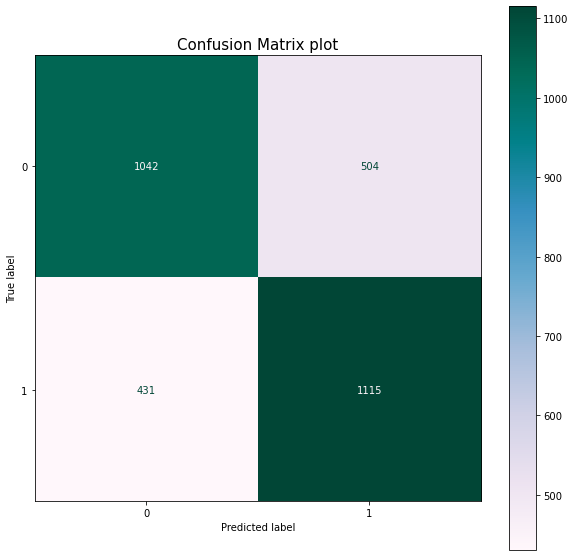

In [690]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'PuBuGn')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.75793915441761


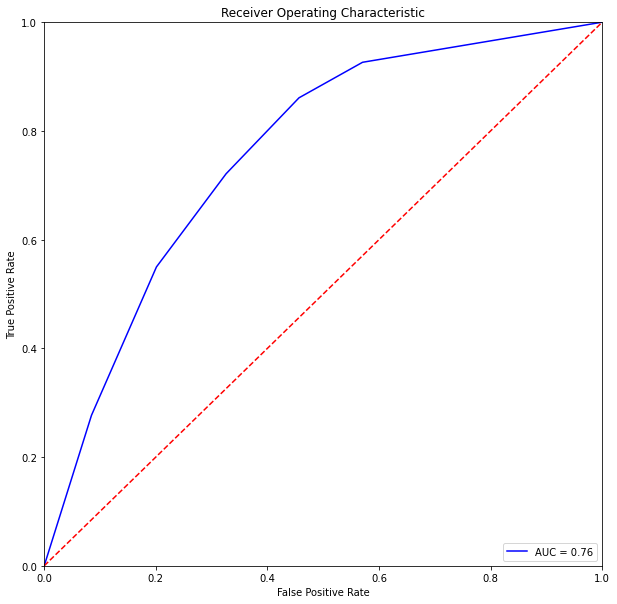

In [691]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet 
## which was modified for our application

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Support Vector Classifier

In [692]:
from sklearn.svm import SVC

In [693]:
model = SVC(probability = True)
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [694]:
print(confusion_matrix(y_cv, y_predictions))

[[1207  339]
 [ 331 1215]]


In [695]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1546
           1       0.78      0.79      0.78      1546

    accuracy                           0.78      3092
   macro avg       0.78      0.78      0.78      3092
weighted avg       0.78      0.78      0.78      3092



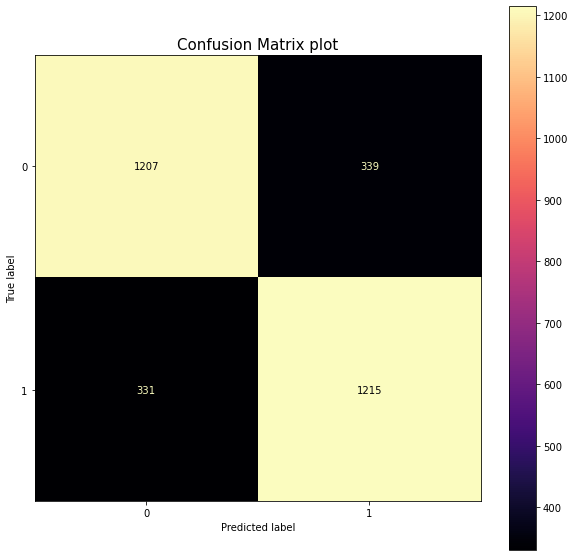

In [696]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'magma')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.8689942245480972


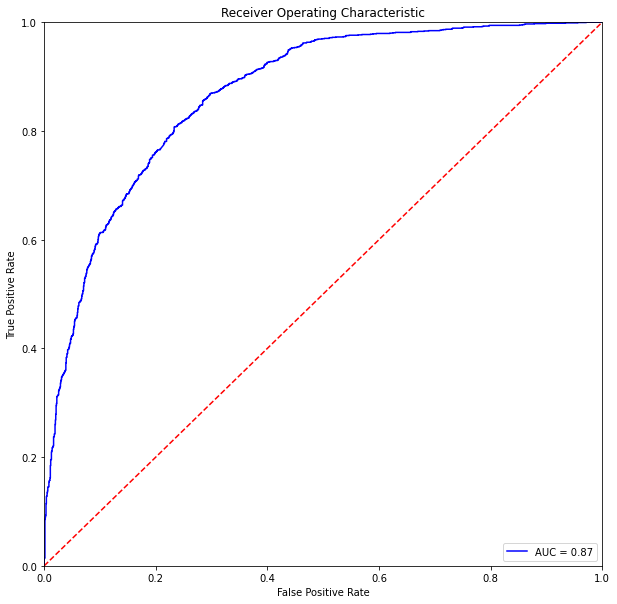

In [697]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression

In [698]:
from sklearn.linear_model import LogisticRegression

In [699]:
model = LogisticRegression()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [700]:
print(confusion_matrix(y_cv, y_predictions))

[[1162  384]
 [ 306 1240]]


In [701]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1546
           1       0.76      0.80      0.78      1546

    accuracy                           0.78      3092
   macro avg       0.78      0.78      0.78      3092
weighted avg       0.78      0.78      0.78      3092



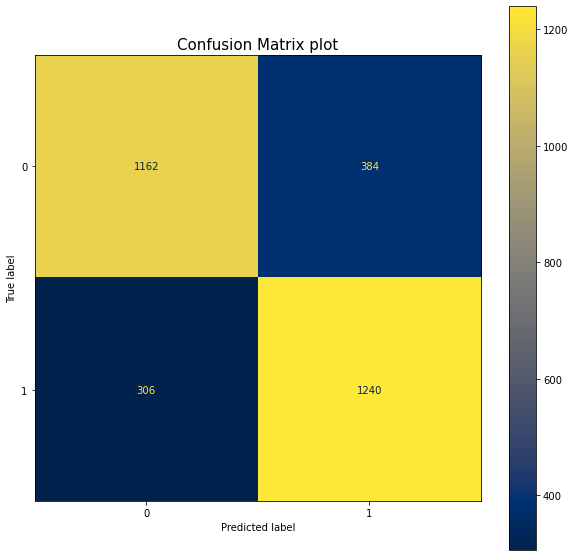

In [702]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'cividis')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.856337516672831


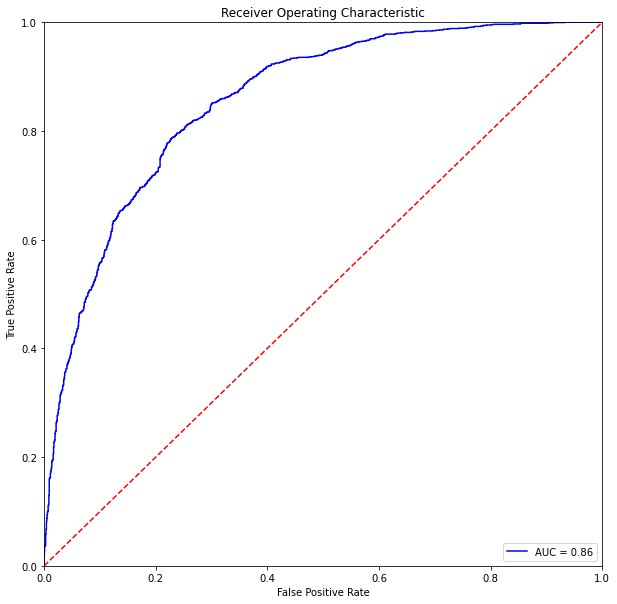

In [703]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree Classifier

In [704]:
from sklearn.tree import DecisionTreeClassifier

In [705]:
model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [706]:
print(confusion_matrix(y_cv, y_predictions))

[[1221  325]
 [ 511 1035]]


In [707]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1546
           1       0.76      0.67      0.71      1546

    accuracy                           0.73      3092
   macro avg       0.73      0.73      0.73      3092
weighted avg       0.73      0.73      0.73      3092



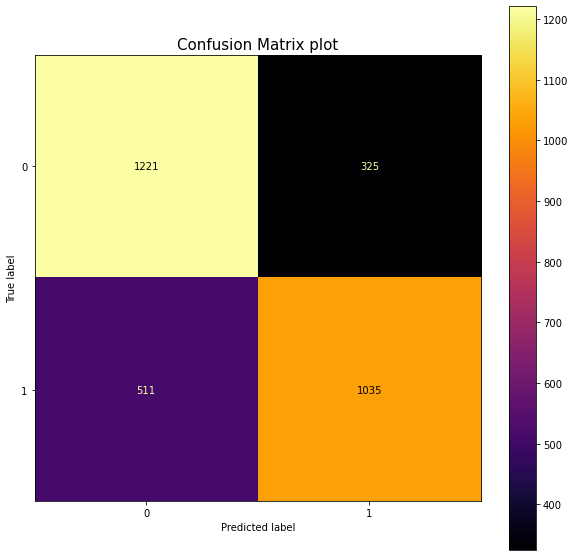

In [708]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'inferno')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.7304335856502362


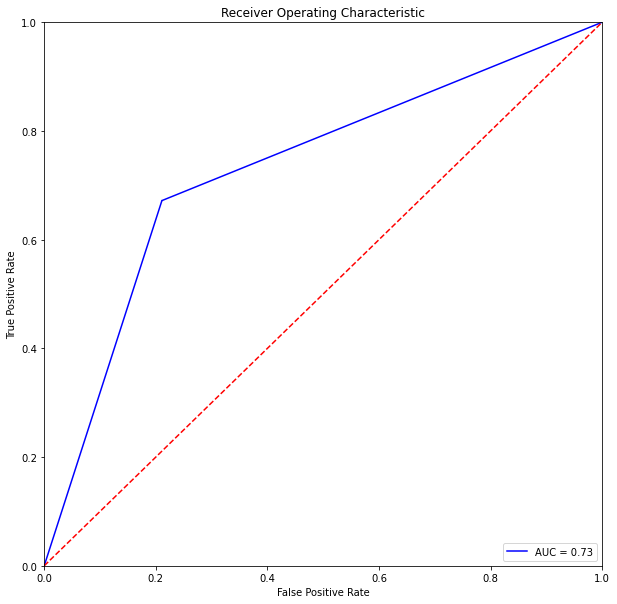

In [709]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gaussian Naive Bayes

In [710]:
from sklearn.naive_bayes import GaussianNB

In [711]:
model = GaussianNB()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [712]:
print(confusion_matrix(y_cv, y_predictions))

[[ 976  570]
 [ 221 1325]]


In [713]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.82      0.63      0.71      1546
           1       0.70      0.86      0.77      1546

    accuracy                           0.74      3092
   macro avg       0.76      0.74      0.74      3092
weighted avg       0.76      0.74      0.74      3092



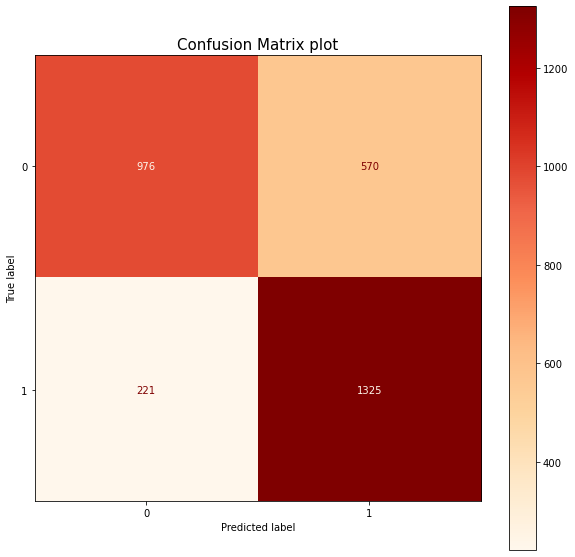

In [714]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'OrRd')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.8307199315849105


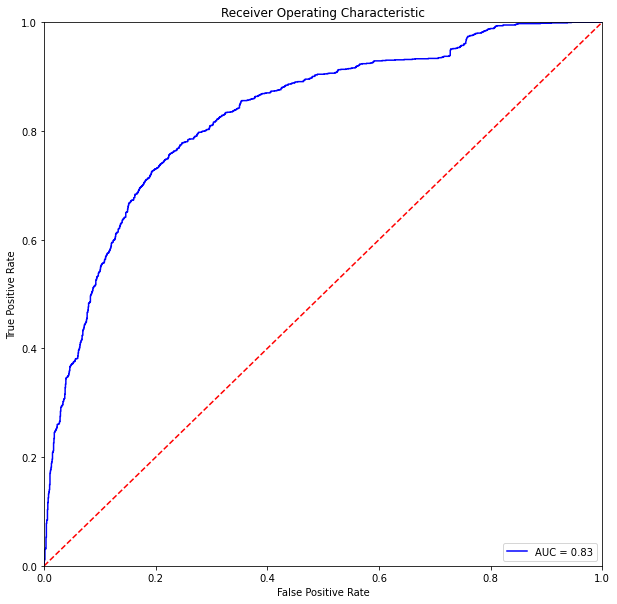

In [715]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classifier

In [716]:
from sklearn.ensemble import RandomForestClassifier

In [717]:
model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [718]:
print(confusion_matrix(y_cv, y_predictions))

[[1320  226]
 [ 410 1136]]


In [719]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81      1546
           1       0.83      0.73      0.78      1546

    accuracy                           0.79      3092
   macro avg       0.80      0.79      0.79      3092
weighted avg       0.80      0.79      0.79      3092



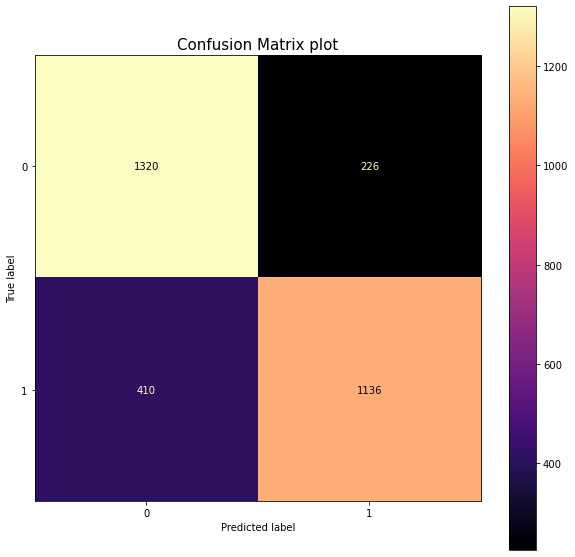

In [720]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'magma')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.883693511109921


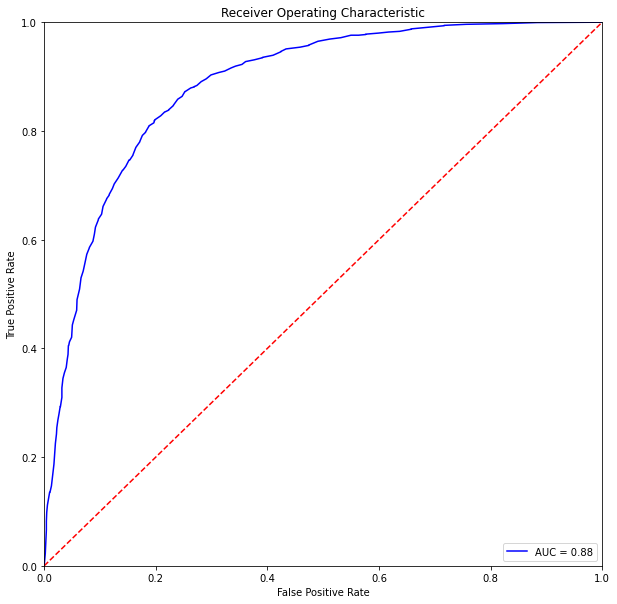

In [721]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Xgb Classifier

In [722]:
#!pip install xgboost

In [723]:
import xgboost as xgb

In [724]:
model = xgb.XGBClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

[16:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [725]:
print(confusion_matrix(y_cv, y_predictions))

[[1323  223]
 [ 275 1271]]


In [726]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1546
           1       0.85      0.82      0.84      1546

    accuracy                           0.84      3092
   macro avg       0.84      0.84      0.84      3092
weighted avg       0.84      0.84      0.84      3092



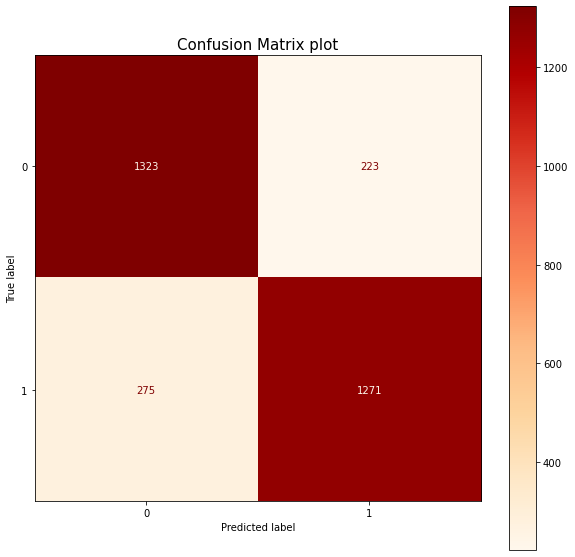

In [727]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'OrRd')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.9266192519526248


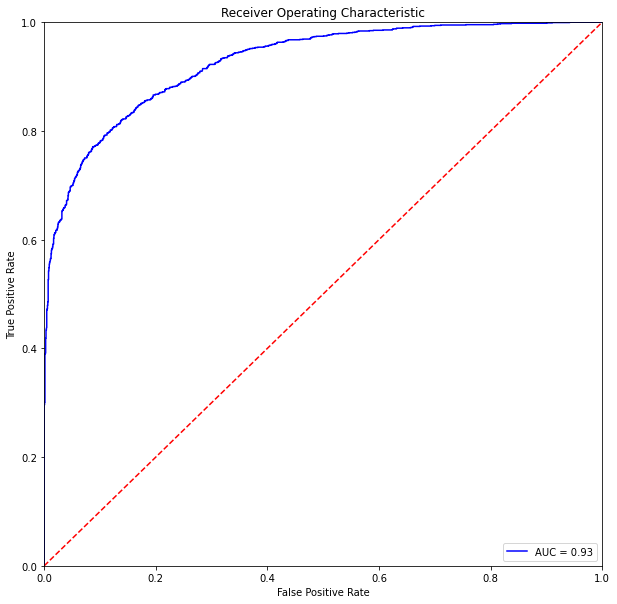

In [728]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()